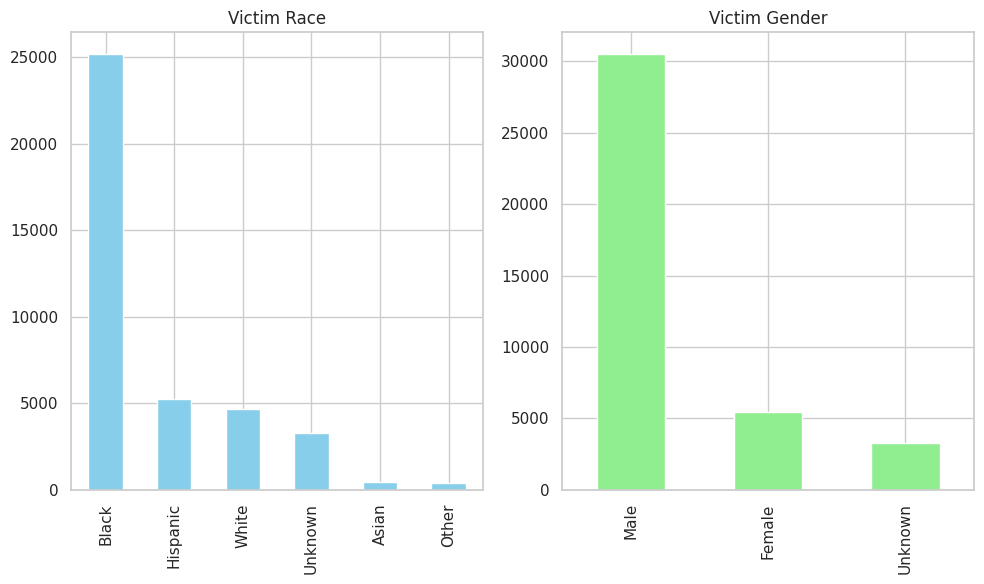

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/distinct_victim_races.csv')

# Count occurrences of each value in both columns
race_counts = df['victim_race'].value_counts()
gender_counts = df['victim_sex'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
race_counts.plot(kind='bar', color='skyblue')
plt.title('Victim Race')

plt.subplot(1, 2, 2)
gender_counts.plot(kind='bar', color='lightgreen')
plt.title('Victim Gender')

plt.tight_layout()
plt.show()


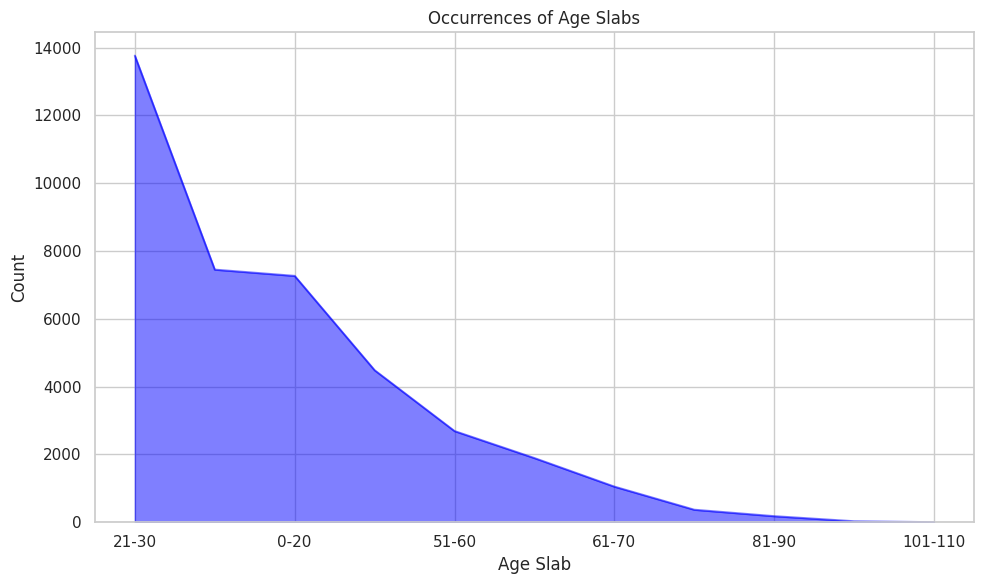

In [19]:
age_counts = df['age_slab'].value_counts()

# Create area plot
plt.figure(figsize=(10, 6))
age_counts.plot(kind='area', color='blue', alpha=0.5)  # Set alpha for transparency
plt.title('Occurrences of Age Slabs')
plt.xlabel('Age Slab')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

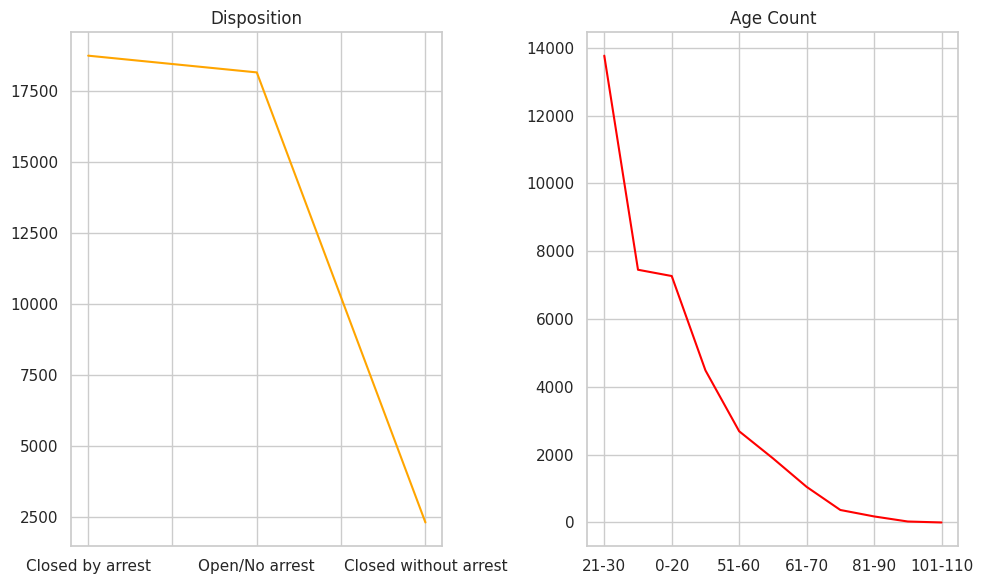

In [20]:
disposition_counts = df['disposition'].value_counts()
age_counts = df['age_slab'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
disposition_counts.plot(kind='line', color='orange')
plt.title('Disposition')

plt.subplot(1, 2, 2)
age_counts.plot(kind='line', color='red')
plt.title('Age Count')

plt.tight_layout()
plt.show()

In [25]:
import plotly.express as px
city_counts = df['city'].value_counts()
state_counts = df['state'].value_counts()


# Create map for state counts
state_map_fig = px.choropleth(locations=state_counts.index, locationmode="USA-states",
                               color=state_counts.values, scope="usa",
                               color_continuous_scale='Reds', title="State Counts")
state_map_fig.show()

In [23]:
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# Merge city counts with original DataFrame
df = df.merge(city_counts, on='city')

# Create city map with Plotly Express
fig = px.scatter_mapbox(df, lat="lat", lon="lon", color="count",
                        size="count", hover_name="city", zoom=3, height=600,
                        color_continuous_scale=px.colors.sequential.Reds,
                        title='City Map with Frequency')

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()